# Solution for a disk with source term

The solution for

$$\nabla^2 u(r, \theta) = f(r, \theta)\quad 0 < r < 1\, $$

with $u(1, \theta) = 0\quad 0 \leq \theta \leq 2\pi$, is given by

$$u(r, \theta) = \frac{1}{2\pi}\int\limits_0^{2\pi}\int\limits_0^1
\ln(R/\bar{R}\rho) f(\rho, \phi) \rho d\rho d\phi\, .$$    

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from numpy import log, arctan2, pi, sqrt, cos
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import meshio

In [3]:
mesh = meshio.read("files/disk.msh")
pts = mesh.points
tris = mesh.cells[-1].data
x, y, _ = pts.T

<IPython.core.display.Javascript object>


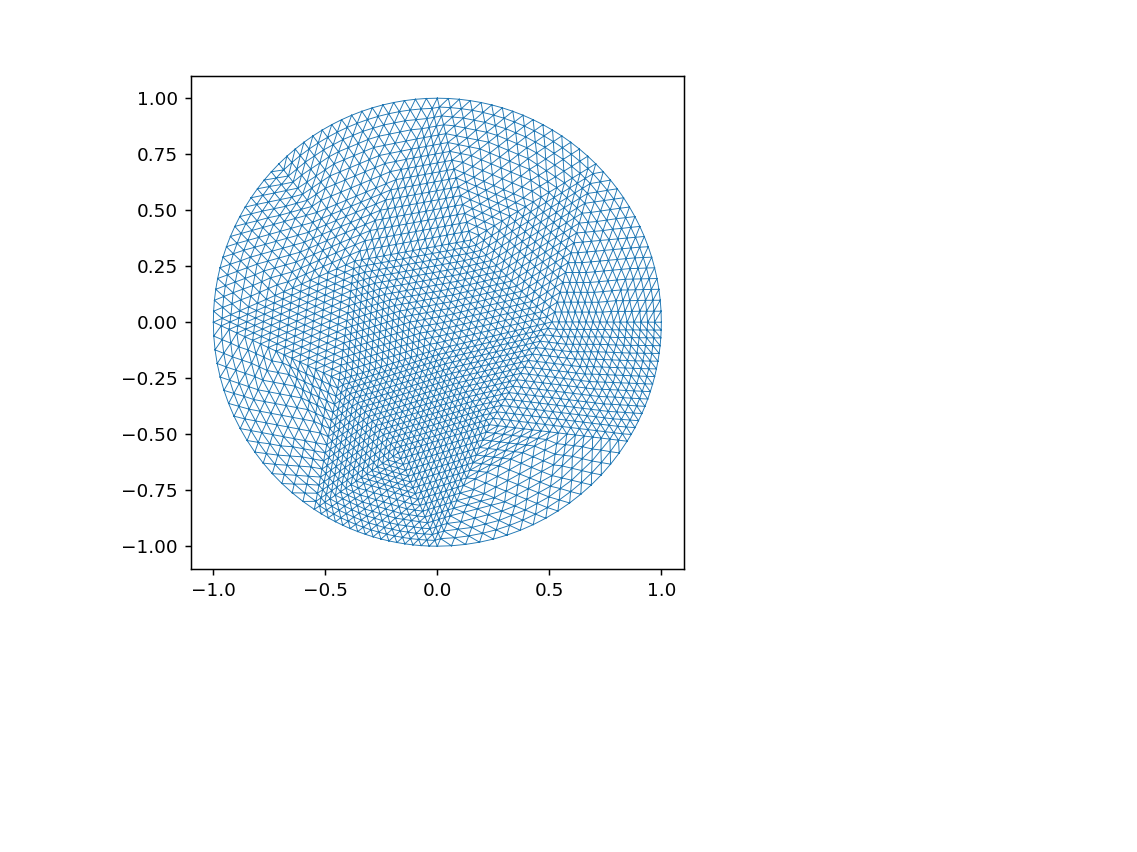

In [4]:
plt.figure()
plt.triplot(x, y, tris, lw=0.5)
plt.axis("image");

In [5]:
def green_fun(rho, phi, r, theta):
    """
    Green function for Poisson equation in a circular domain
    
    Parameters
    ----------
    rho : float
        Radial coordinate for the loading point.
    phi : float
        Azimuthal coordinate for the loading point.
    r : float
        Radial coordinate for the observation point.
    theta : float
        Azimuthal coordinate for the observation point.

    Returns
    -------
    phi : float
        Value of the potential at (r, theta).
    """
    R = sqrt(r**2 - 2*r*rho*cos(theta - phi) + rho**2)
    Rc = sqrt(r**2 - 2*r/rho*cos(theta - phi) + 1/rho**2)
    return 0.5/pi * log(R/(Rc*rho))

In [6]:
def area_tri(coords):
    """Compute the area of a triangle with given coordinates

    Parameters
    ----------
    coords : ndarray, float
        Coordinates for the nodes of the triangle.

    Returns
    -------
    area : float
        Area of the triangle
    """
    mat = coords.copy()
    mat[:, 2] = 1
    return 0.5 * np.abs(np.linalg.det(mat))

In [7]:
def eval_domain(eval_pts, pts, tris, source):
    """
    Evaluate the solution inside the disk for
    a given source.

    Parameters
    ----------
    eval_pts : ndarray, float
        Coordinates for the nodes of evaluation.
    pts : ndarray, float
        Coordinates for the nodes of the triangle.
    tris : ndarray, int
        Connectivity for the triangles.
    source : callable
        Source term.

    Returns
    -------
    potential : ndarray, float
        Potential evaluated at each observation point.
    """
    potential = np.zeros_like(eval_pts[:, 0])
    for tri in tris:
        coords = pts[tri]
        area = area_tri(coords)
        xm, ym, _ = np.mean(coords, axis=0)
        f = source(xm, ym)
        rho = np.sqrt(xm**2 + ym**2)
        phi = np.arctan2(ym, xm)
        for cont, pt in enumerate(eval_pts):
            pt_x, pt_y, _ = pt
            r = np.sqrt(pt_x**2 + pt_y**2)
            theta = np.arctan2(pt_y, pt_x)
            pot = green_fun(rho, phi, r, theta)
            potential[cont] += area * pot * f
    return potential

## Example: uniform load

In this case we have the problem

$$\nabla^2 u(r, \theta) = 1\quad 0 < r < 1\, $$

with $u(1, \theta) = 0$.


The analytical solution in this case is given by


$$u(r) = \frac{(r^2 - 1)}{4}\, .$$

In [8]:
source = lambda xm, ym: 1
potential = eval_domain(pts, pts, tris, source)

<IPython.core.display.Javascript object>


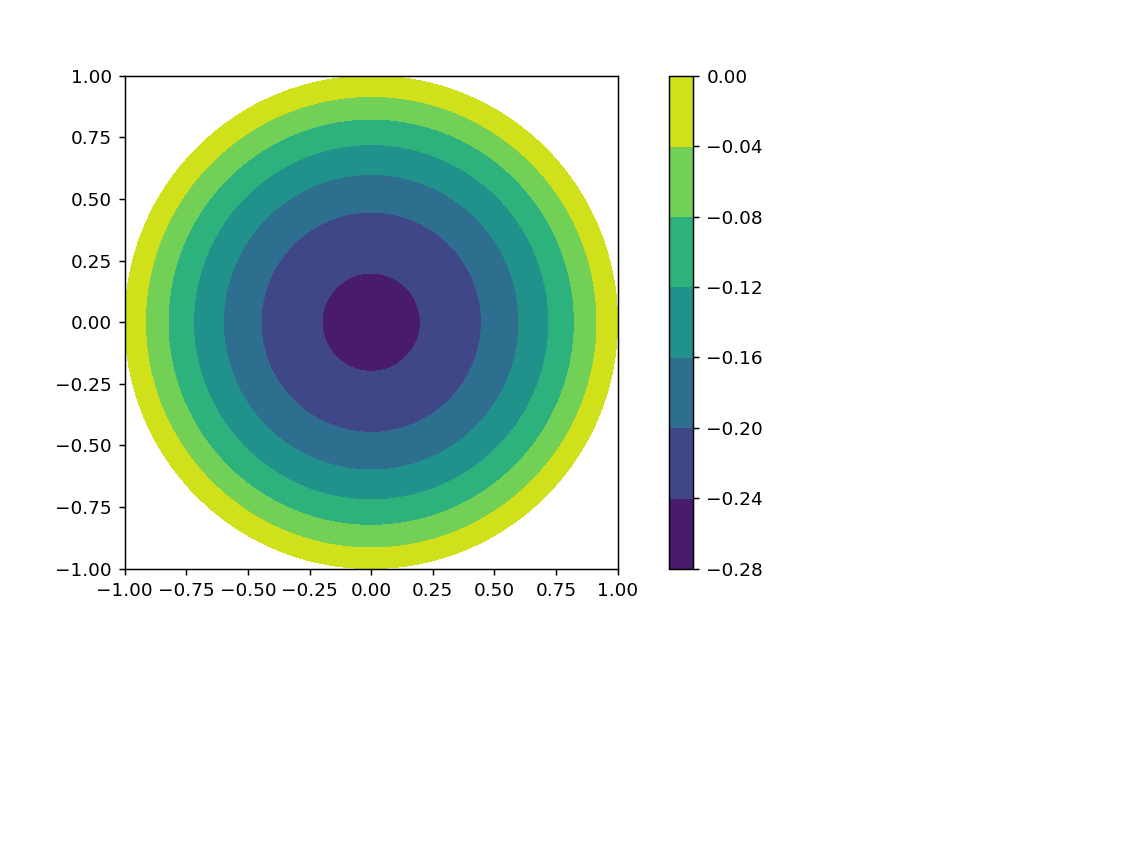

In [9]:
plt.figure()
plt.tricontourf(x, y, tris, potential )
plt.colorbar()
plt.axis("image");

The following plot shows the error.

<IPython.core.display.Javascript object>


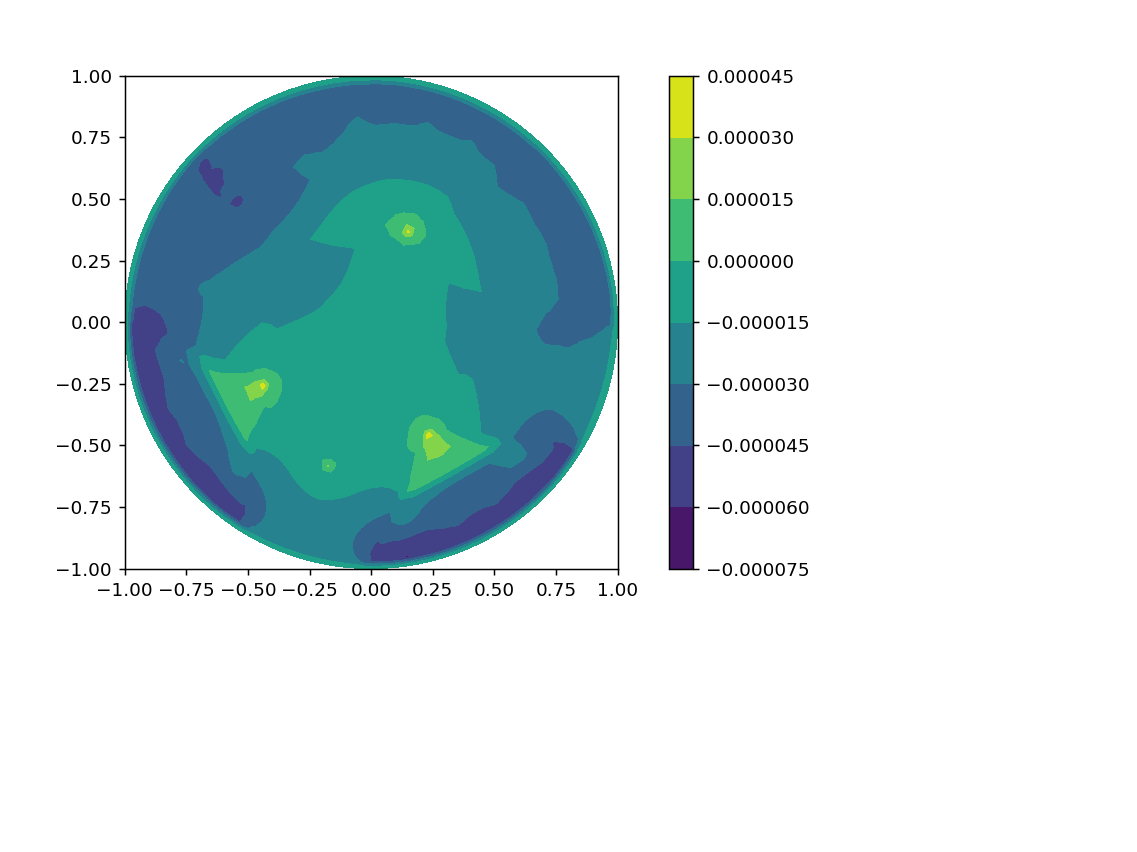

In [10]:
plt.figure()
r = np.sqrt(x**2 + y**2)
plt.tricontourf(x, y, tris, 0.25*(r**2 - 1) - potential)
plt.colorbar()
plt.axis("image");

## Example with angular variation

In this case we have the problem

$$\nabla^2 u(x, y) = 8 y (3 x^2 + 3 y^2 - 1)
\quad 0 < x^2 + y^2 < 1\, $$

with $u = 0$ at $x^2 +y^2 = 1$.


The analytical solution in this case is given by


$$u(x, y) = y (x^2 + y^2) (x^2 + y^2 - 1)
\, .$$

In [11]:
source = lambda xm, ym: 8*ym*(3*xm**2 + 3*ym**2 - 1)
potential = eval_domain(pts, pts, tris, source)

<IPython.core.display.Javascript object>


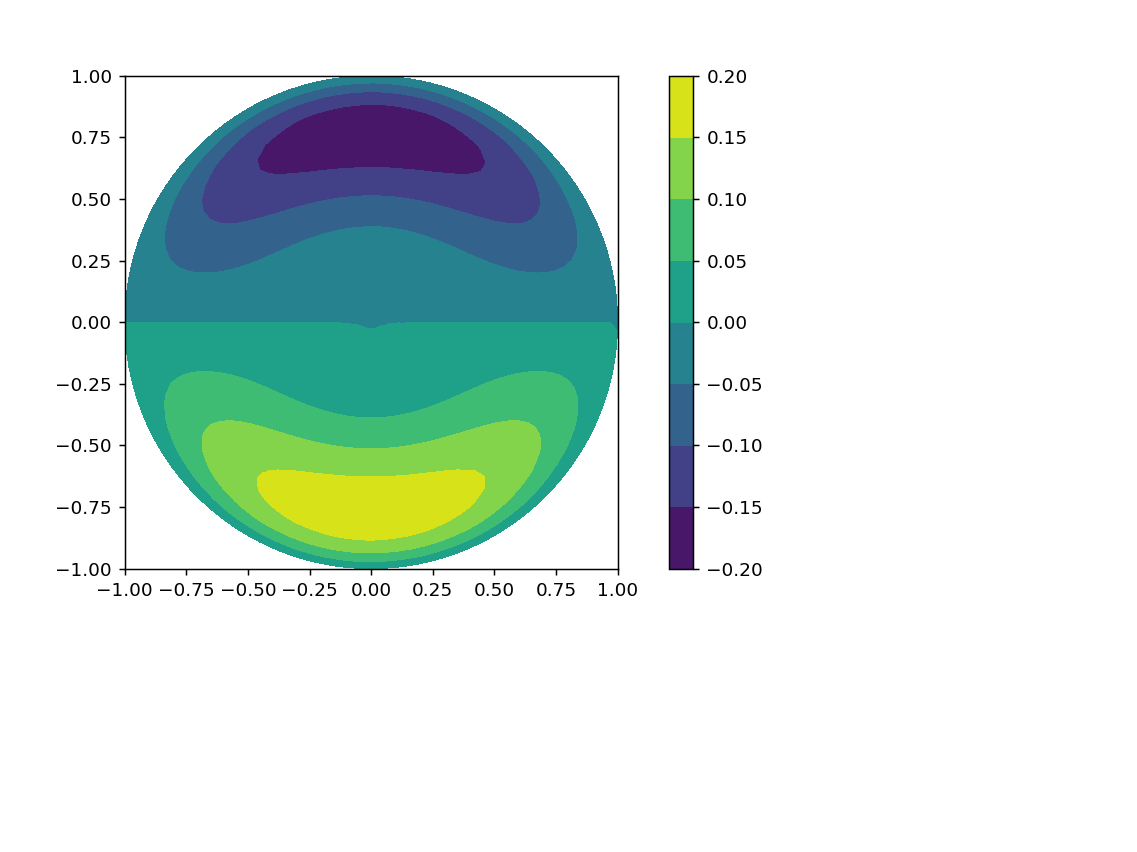

In [12]:
plt.figure()
plt.tricontourf(x, y, tris, potential)
plt.colorbar()
plt.axis("image");

<IPython.core.display.Javascript object>


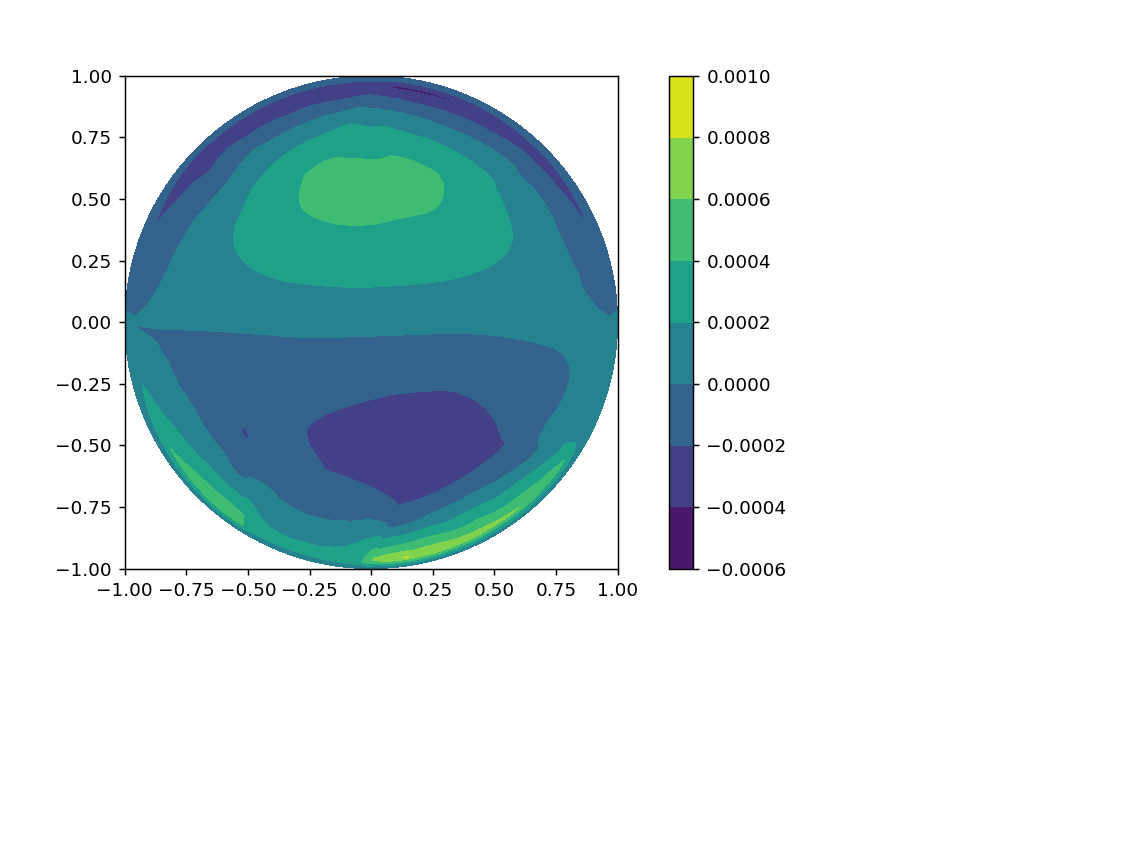

In [13]:
plt.figure()
r = np.sqrt(x**2 + y**2)
plt.tricontourf(x, y, tris,
                (x**2 + y**2) * (x**2 + y**2 - 1) * y - potential)
plt.colorbar()
plt.axis("image");

In [14]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'custom.css'
HTML(open(css_file, "r").read())